# LEGO Data Exploration

# Introduction

This project extensively explores a dataset concerning LEGO. Through this dataset, numerous intriguing inquiries can be made regarding the history of the LEGO company, their range of products, and which specific LEGO set reigns supreme.

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I used three datasets, colors.csv, sets.csv, themes.csv, that can be easily downloaded.

<img src=assets/bricks.jpg>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

Read the colors.csv file and find the total number of unique colours to answer the following question. How many different colours does the LEGO company produce?

In [2]:
df_colors = pd.read_csv("data/colors.csv")

In [3]:
df_colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
df_colors["name"].nunique()

267

Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. This can be accomplished in two different ways using value_counts() and groupby() methods.

In [5]:
df_colors.is_trans.value_counts()

is_trans
f    222
t     45
Name: count, dtype: int64

In [6]:
df_colors.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,222,222,222
t,45,45,45


### **Understanding LEGO Themes vs. LEGO Sets**

When you step into a LEGO store, you'll find their products categorized by various themes such as Star Wars, Harry Potter, Marvel, and numerous others.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src=assets/lego_sets.png>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

Read the sets.csv data and take a look at the first and last couple of rows.

In [8]:
df_sets = pd.read_csv("data/sets.csv")

In [9]:
df_sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [10]:
df_sets.tail()

,set_num,name,year,theme_id,num_parts,img_url
22574,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
22575,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...
22576,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
22577,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
22578,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0,https://cdn.rebrickable.com/media/sets/zx8000-...


In which year were the first LEGO sets released and what were these sets called?

In [11]:
df_sets.sort_values("year").head()

,set_num,name,year,theme_id,num_parts,img_url
13613,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...
13601,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
13588,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
13612,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
13606,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...


How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [12]:
df_sets[df_sets["year"] == 1949]

,set_num,name,year,theme_id,num_parts,img_url
13588,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
13601,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
13606,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...
13612,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
13613,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...


Find the top 5 LEGO sets with the most number of parts.

In [13]:
df_sets.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts,img_url
4431,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
424,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
21256,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...
410,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
391,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...


Show the number of LEGO sets released year-on-year.

In [14]:
sets_by_year = df_sets.groupby("year").count()
sets_by_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    39
Name: set_num, dtype: int64

In [15]:
sets_by_year["set_num"].tail()

year
2020    1046
2021    1159
2022    1033
2023    1025
2024     386
Name: set_num, dtype: int64

Show the number of LEGO releases on a line chart using Matplotlib.

Note that the .csv file is from early 2024, so to plot the full calendar years, I had to exclude some data from the chart using the slicing techniques to avoid plotting the last two years.

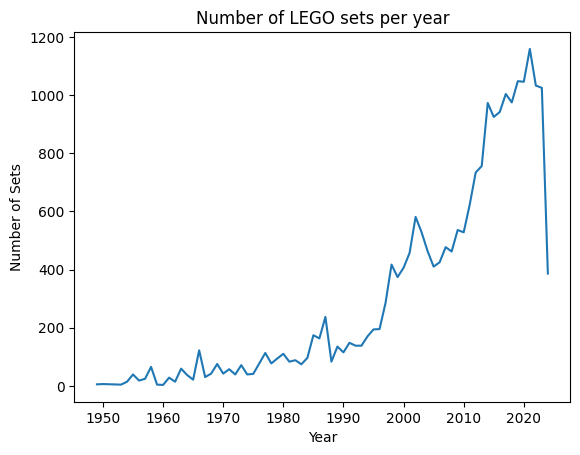

In [16]:
plt.plot(sets_by_year["set_num"])
plt.title("Number of LEGO sets per year")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.show()

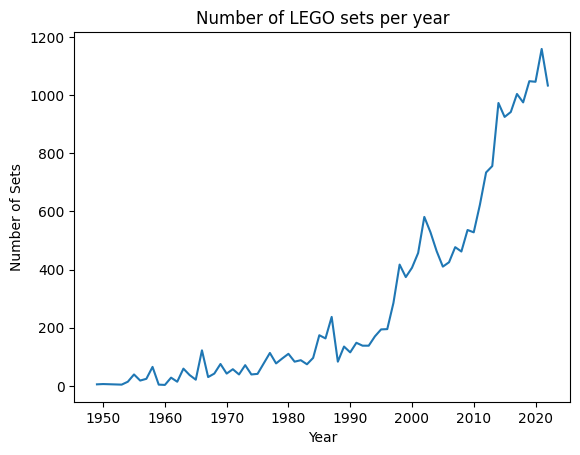

In [17]:
plt.plot(sets_by_year["set_num"][:-2])
plt.title("Number of LEGO sets per year")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.show()

### Aggregate Data

Determine the count of distinct themes shipped each year. This involves counting the number of unique theme IDs for each calendar year.

In [18]:
themes_by_year = df_sets.groupby("year").agg({"theme_id": pd.Series.nunique})

In [19]:
themes_by_year.rename(columns={"theme_id":"nr_themes"}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,6


In [20]:
themes_by_year.tail()

,nr_themes
year,
2020,103
2021,98
2022,94
2023,102
2024,62


Plot the number of themes released by year on a line chart. Only include the full calendar years.

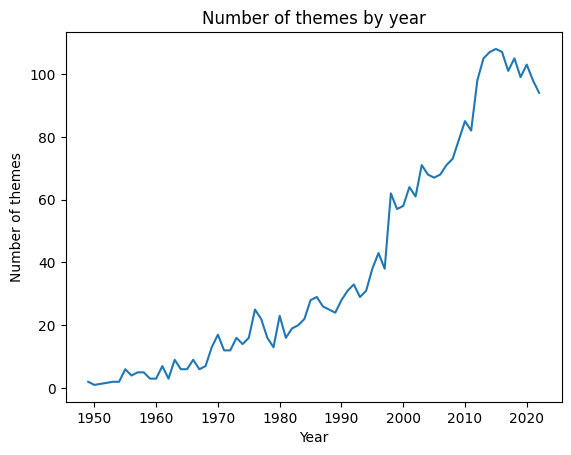

In [21]:
plt.plot(themes_by_year['nr_themes'][:-2])
plt.title("Number of themes by year")
plt.xlabel("Year")
plt.ylabel("Number of themes")
plt.show()

### Line Charts with Two Seperate Axes

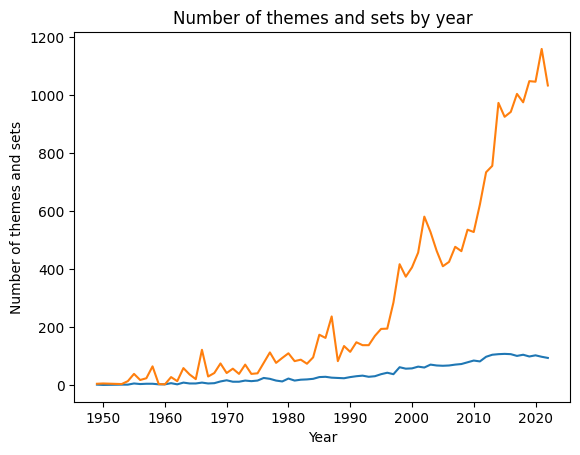

In [22]:
# Plotting number of themes and sets using the same axis
# Not good result since the range is very different
plt.plot(themes_by_year['nr_themes'][:-2])
plt.plot(sets_by_year["set_num"][:-2])
plt.title("Number of themes and sets by year")
plt.xlabel("Year")
plt.ylabel("Number of themes and sets")
plt.show()

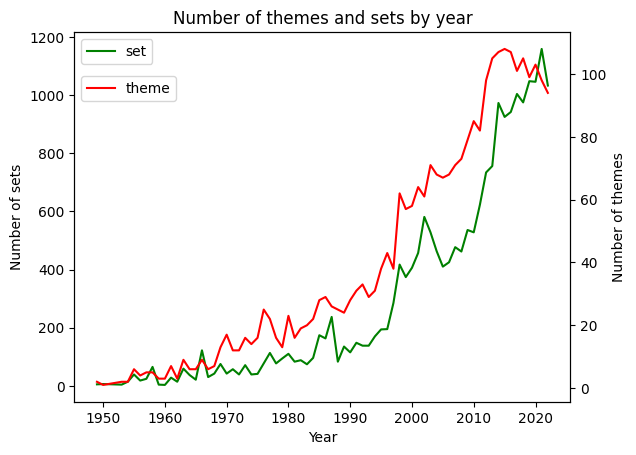

In [23]:
# Plotting number of themes and sets using two axis
# Better result using axis object from matplotlib
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis
ax1.plot(sets_by_year["set_num"][:-2], color="green", label="set")
ax2.plot(themes_by_year["nr_themes"][:-2], color="red", label="theme")

plt.title("Number of themes and sets by year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of sets")
ax2.set_ylabel("Number of themes")
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
plt.show()

Figure out the average number of parts per set.

In [24]:
parts_per_set = df_sets.groupby("year").agg({"num_parts": pd.Series.mean})

In [25]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,12.205128


In [26]:
parts_per_set.tail()

,num_parts
year,
2020,202.842256
2021,229.032787
2022,272.231365
2023,293.037073
2024,282.354922


### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time.

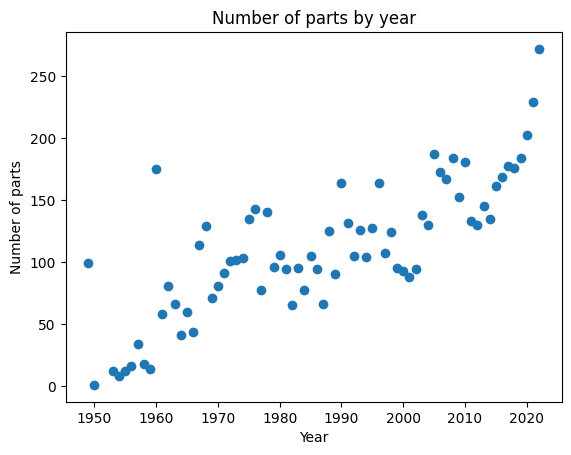

In [27]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])
plt.title("Number of parts by year")
plt.xlabel("Year")
plt.ylabel("Number of parts")
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. Which theme has the largest number of individual sets?

In [28]:
set_theme_count = df_sets["theme_id"].value_counts()
set_theme_count[:5]

theme_id
158    906
503    702
501    633
494    580
435    525
Name: count, dtype: int64

### Database Schema
<img src=assets/rebrickable_schema.png>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

Explore the themes.csv

In [32]:
df_themes = pd.read_csv("data/themes.csv")

In [33]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [34]:
df_themes.tail()

,id,name,parent_id
455,758,Non-fiction Books,497.0
456,759,Story Books,497.0
457,760,Activity Books,497.0
458,761,Activity Books with LEGO Parts,497.0
459,762,Series 26 Minifigures,535.0


In [35]:
df_themes[df_themes["name"] == "Star Wars"]

,id,name,parent_id
5,18,Star Wars,1.0
74,158,Star Wars,NaN
95,209,Star Wars,207.0
122,261,Star Wars,258.0


In [36]:
df_sets[df_sets["theme_id"] == 18]

,set_num,name,year,theme_id,num_parts,img_url
12638,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1,https://cdn.rebrickable.com/media/sets/65081-1...
16834,8000-1,Pit Droid,2000,18,223,https://cdn.rebrickable.com/media/sets/8000-1.jpg
16841,8001-1,Battle Droid,2000,18,336,https://cdn.rebrickable.com/media/sets/8001-1.jpg
16852,8002-1,Destroyer Droid,2000,18,567,https://cdn.rebrickable.com/media/sets/8002-1.jpg
16887,8007-1,C-3PO,2001,18,339,https://cdn.rebrickable.com/media/sets/8007-1.jpg
16888,8008-1,Stormtrooper,2001,18,361,https://cdn.rebrickable.com/media/sets/8008-1.jpg
16889,8009-1,R2-D2,2002,18,239,https://cdn.rebrickable.com/media/sets/8009-1.jpg
16890,8010-1,Darth Vader,2002,18,388,https://cdn.rebrickable.com/media/sets/8010-1.jpg
16902,8011-1,Jango Fett,2002,18,425,https://cdn.rebrickable.com/media/sets/8011-1.jpg
16907,8012-1,Super Battle Droid,2002,18,378,https://cdn.rebrickable.com/media/sets/8012-1.jpg


### Merging DataFrames based on a Key


In [37]:
df_sets[df_sets["theme_id"] == 209]

,set_num,name,year,theme_id,num_parts,img_url
15453,75023-1,Star Wars Advent Calendar 2013,2013,209,254,https://cdn.rebrickable.com/media/sets/75023-1...
15486,75056-1,Star Wars Advent Calendar 2014,2014,209,275,https://cdn.rebrickable.com/media/sets/75056-1...
15520,75097-1,Star Wars Advent Calendar 2015,2015,209,291,https://cdn.rebrickable.com/media/sets/75097-1...
15571,75146-1,Star Wars Advent Calendar 2016,2016,209,282,https://cdn.rebrickable.com/media/sets/75146-1...
15613,75184-1,Star Wars Advent Calendar 2017,2017,209,309,https://cdn.rebrickable.com/media/sets/75184-1...
15646,75213-1,Star Wars Advent Calendar 2018,2018,209,307,https://cdn.rebrickable.com/media/sets/75213-1...
15685,75245-1,Star Wars Advent Calendar 2019,2019,209,280,https://cdn.rebrickable.com/media/sets/75245-1...
15721,75279-1,Star Wars Advent Calendar 2020,2020,209,311,https://cdn.rebrickable.com/media/sets/75279-1...
15747,75307-1,Star Wars Advent Calendar 2021,2021,209,336,https://cdn.rebrickable.com/media/sets/75307-1...
15784,75340-1,Star Wars Advent Calendar 2022,2022,209,329,https://cdn.rebrickable.com/media/sets/75340-1...


In [38]:
set_theme_count = pd.DataFrame({"id": set_theme_count.index,
                                "set_count":set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,906
1,503,702
2,501,633
3,494,580
4,435,525


### Merging set_theme_count and df_themes tables

In [39]:
merged_df = pd.merge(set_theme_count, df_themes, on="id")
merged_df[:5]

,id,set_count,name,parent_id
0,158,906,Star Wars,NaN
1,503,702,Key Chain,501.0
2,501,633,Gear,NaN
3,494,580,Friends,NaN
4,435,525,Ninjago,NaN


### Plotting bar chart

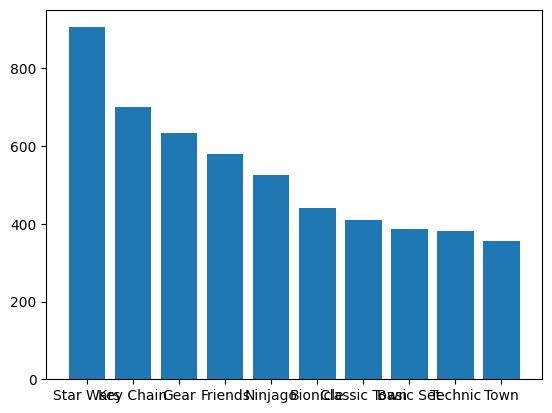

In [43]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])
plt.show()

### Improving bar chart

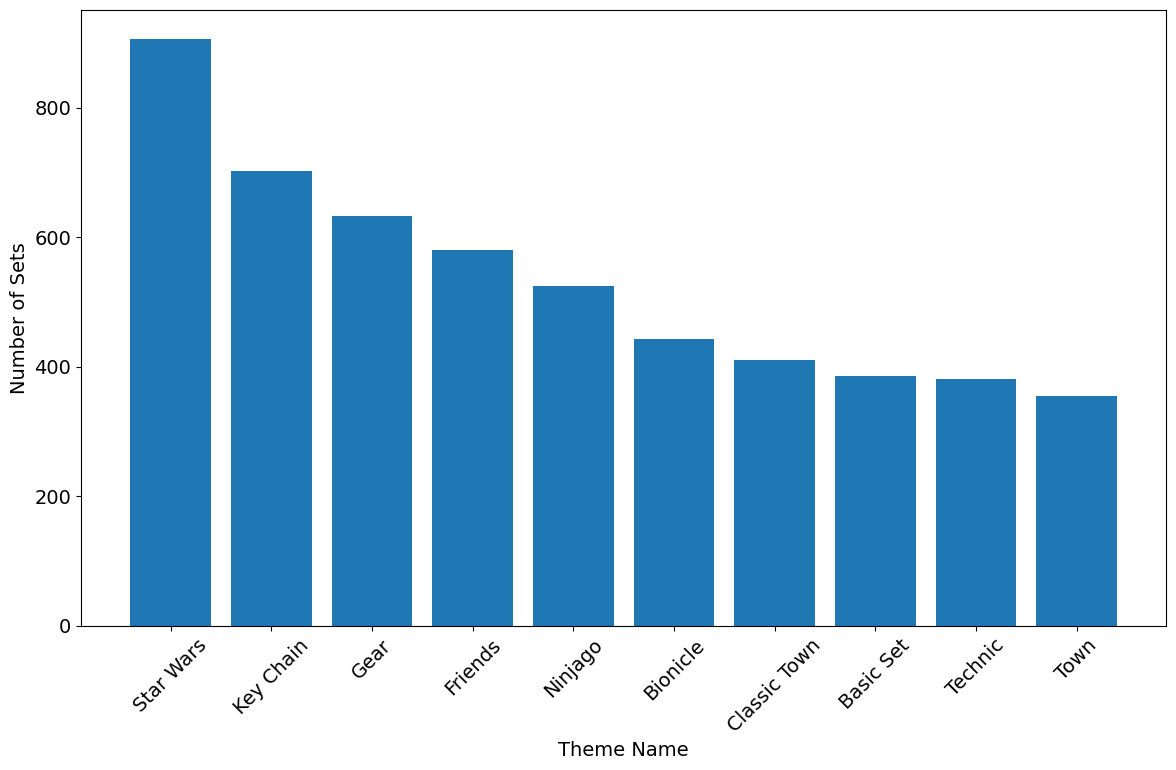

In [46]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Theme Name", fontsize=14)
plt.ylabel("Number of Sets", fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])
plt.show()